Classify the email using the binary classification method. <br>
Email Spam detection has two states: a) Normal State – Not Spam, b) Abnormal State – Spam. 
<br>Use K-Nearest Neighbors and Support Vector Machine for classification. 
<br>Analyze their performance.
<br>Dataset link: The emails.csv dataset on the Kaggle
https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data=pd.read_csv('emails.csv.xls')

In [3]:
data.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [4]:
df=data.copy()

<AxesSubplot: xlabel='Prediction', ylabel='count'>

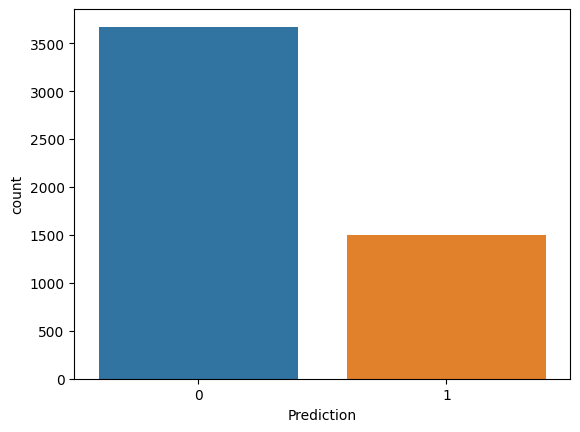

In [5]:
df.describe()
x=df.drop(['Email No.','Prediction'],axis=1)
y=df['Prediction']
sns.countplot(x=y)

In [14]:
x.dtypes

the               int64
to                int64
ect               int64
and               int64
for               int64
                  ...  
infrastructure    int64
military          int64
allowing          int64
ff                int64
dry               int64
Length: 3000, dtype: object

In [11]:
y.dtypes

dtype('int64')

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_std=scaler.fit_transform(x)

In [16]:
x_std

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03809524, 0.09848485, 0.06705539, ..., 0.        , 0.00877193,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00952381, 0.0530303 , 0.        , ..., 0.        , 0.00877193,
        0.        ],
       [0.1047619 , 0.18181818, 0.01166181, ..., 0.        , 0.        ,
        0.        ]])

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=0)

In [23]:
#KNN
knn=KNeighborsClassifier(n_neighbors=5,)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.8646907216494846

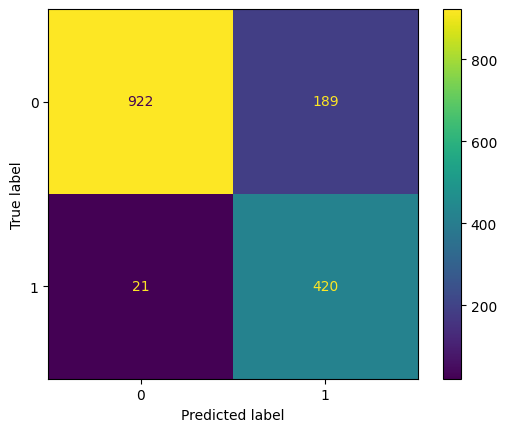

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
y_preds=knn.predict(x_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_preds)

In [25]:
error=[]
for k in range(1,41):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_preds=knn.predict(x_test)
    error.append(np.mean(y_preds!=y_test))
error

[0.10824742268041238,
 0.10502577319587629,
 0.11855670103092783,
 0.11082474226804123,
 0.13530927835051546,
 0.12886597938144329,
 0.15914948453608246,
 0.15528350515463918,
 0.17719072164948454,
 0.17010309278350516,
 0.19974226804123713,
 0.19652061855670103,
 0.21520618556701032,
 0.21198453608247422,
 0.22809278350515463,
 0.22551546391752578,
 0.23904639175257733,
 0.23646907216494845,
 0.2538659793814433,
 0.25193298969072164,
 0.2654639175257732,
 0.26417525773195877,
 0.27448453608247425,
 0.27512886597938147,
 0.28865979381443296,
 0.2867268041237113,
 0.3015463917525773,
 0.3002577319587629,
 0.3086340206185567,
 0.30605670103092786,
 0.3131443298969072,
 0.3125,
 0.31894329896907214,
 0.3176546391752577,
 0.32989690721649484,
 0.3279639175257732,
 0.33634020618556704,
 0.33505154639175255,
 0.34085051546391754,
 0.3389175257731959]

In [26]:
#SVC
svc=SVC(C=1.0,kernel='rbf',gamma='auto')

In [ ]:
svc.fi